In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [66]:
# load the train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [67]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [68]:


# Create a column from the datetime variable
# Convert that column into a datetime datatype
train['application_date'] = pd.to_datetime(train['application_date'])
# Set the datetime column as the index
train.index = train['application_date'] 
# Create a column from the numeric score variable


In [69]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
application_date,,,,,,
2017-04-01,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [70]:
train = train.resample('D').sum()

<Figure size 432x288 with 0 Axes>

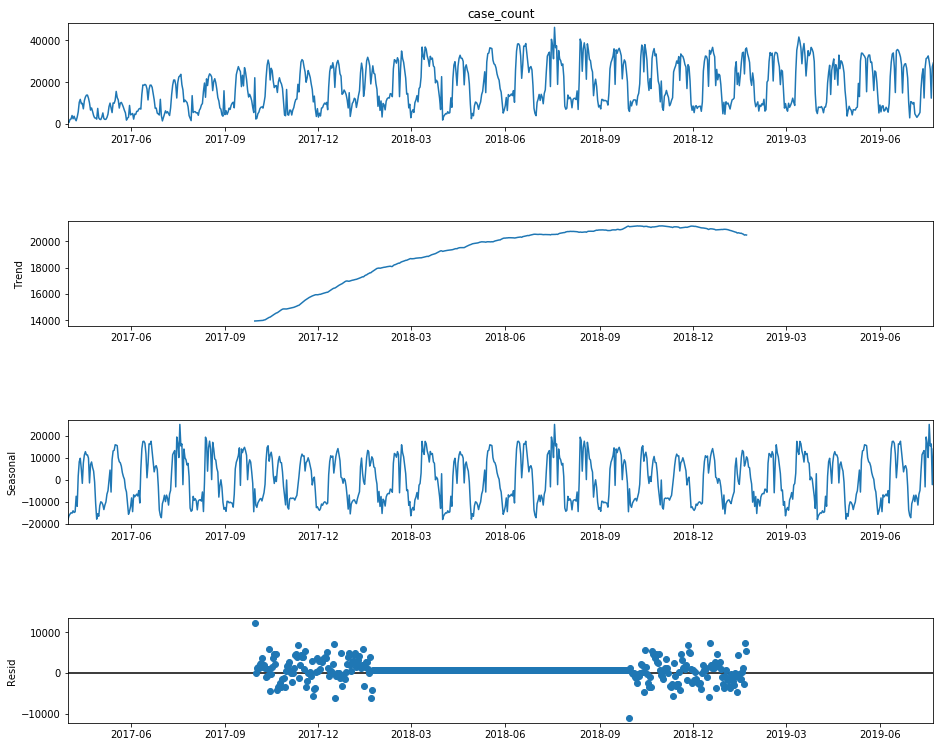

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(data_train['case_count'], model='additive', freq=365)
result = seasonal_decompose(train.case_count.dropna(),freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

<Figure size 432x288 with 0 Axes>

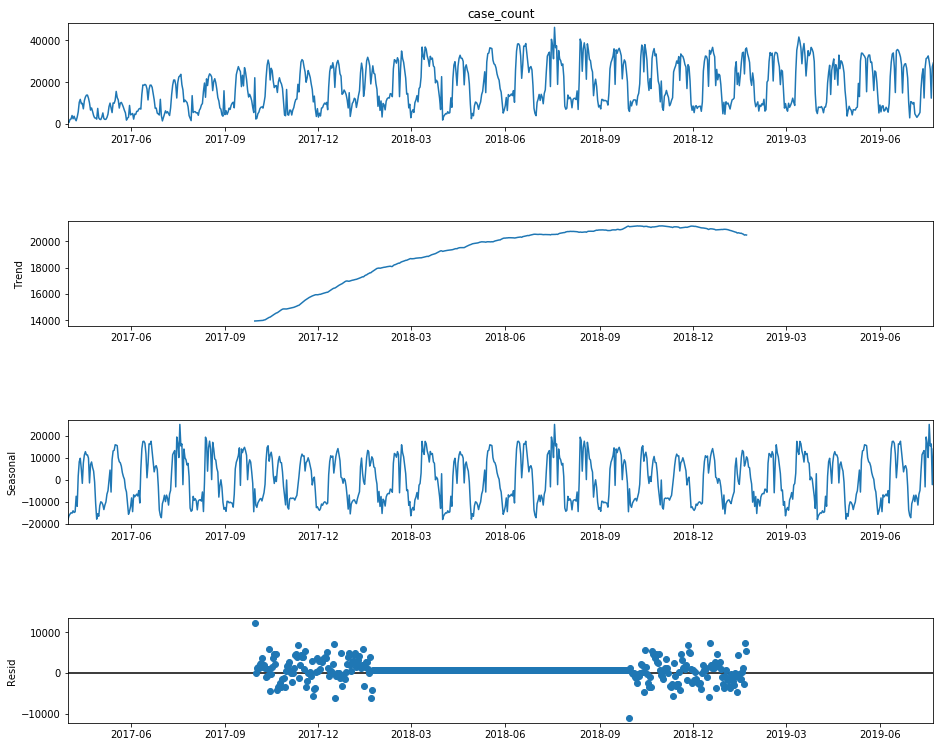

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train['case_count'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [18]:
import statsmodels.api as sm
res = sm.tsa.adfuller(train['case_count'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))
res = sm.tsa.adfuller(train['case_count'].dropna(),regression='c')
print('p-value:{}'.format(res[1]))
res = sm.tsa.adfuller(train['case_count'].dropna(),regression='ctt')
print('p-value:{}'.format(res[1]))
res = sm.tsa.adfuller(train['case_count'].dropna(),regression='nc')
print('p-value:{}'.format(res[1]))

p-value:3.431350532891219e-05
p-value:0.0014648071193256514
p-value:2.8799689502673066e-16
p-value:0.41412791235657825


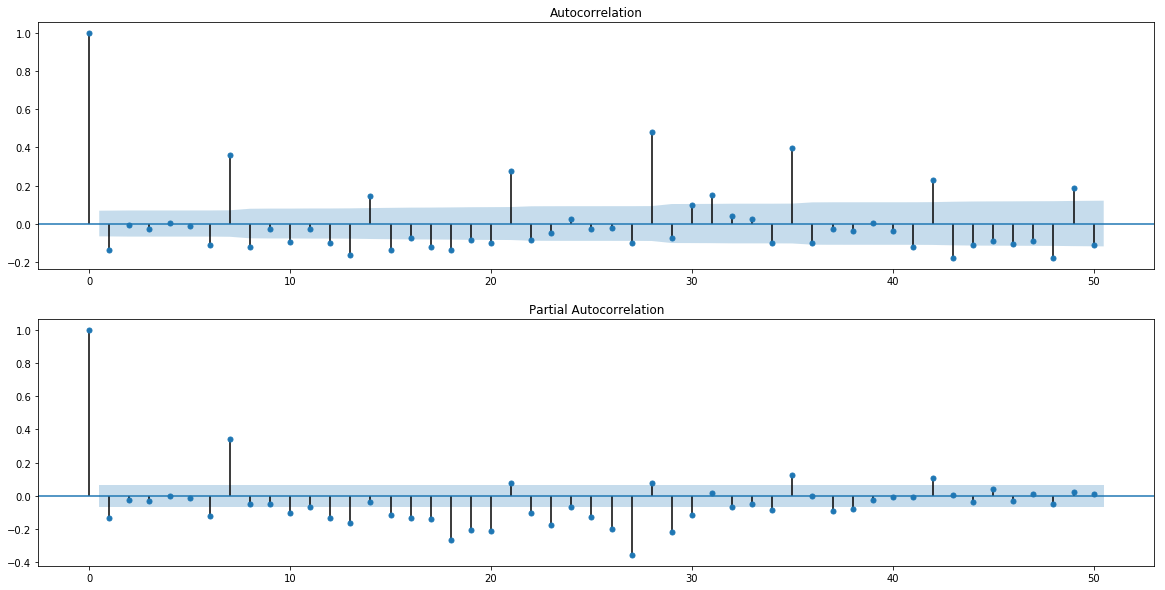

In [74]:
tra = train['case_count']
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

In [27]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (6, 4) is the best.


In [145]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
#train['case_count_diff'] = train['case_count'] - train['case_count'].shift(1)
mod = sm.tsa.statespace.SARIMAX(train.ix[:'2019-07-05']['case_count'], order=(6,1,4), seasonal_order=(1,1,1,30)).fit()
#model_2 = SARIMAX(log_2.ix['2018-07-01':], order=(1, 1, 1), seasonal_order=(1,1,1,30))
#mod.summary()

#arima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,0),seasonal_order=(0,0,0,0),
#                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
#arima.summary()

In [149]:
from sklearn.metrics import mean_squared_error
prediction = list()
prediction
y = mod.forecast(180)
len(y)

180

In [150]:
df = pd.DataFrame(y) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2019-07-24 to 2020-01-19
Freq: D
Data columns (total 1 columns):
0    180 non-null float64
dtypes: float64(1)
memory usage: 2.8 KB


In [152]:
df.to_csv('D:\PGDBA\Competitions\AVL&T\Final.csv')

In [154]:
train

,segment,branch_id,case_count
application_date,,,
2017-04-01,115,9863.0,1196.0
2017-04-02,32,0.0,605.0
2017-04-03,115,9863.0,2058.0
2017-04-04,115,9863.0,2268.0
2017-04-05,115,9863.0,3945.0
2017-04-06,32,0.0,2379.0
2017-04-07,115,9863.0,3590.0
2017-04-08,32,0.0,2297.0
2017-04-09,32,0.0,1435.0
